In [4]:
import numpy as np
import pandas as pd
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import keras.utils

import os
import shutil
from PIL import Image, ImageOps
from IPython.display import Image as IPyImage, display

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from ultralytics import YOLO

# Формирование списка путей к фотографиям

In [5]:
dir_train_img = r'dataset\images\train'
dir_train_label = r'dataset\labels\train'

dir_test_img = r'dataset\images\val'
dir_test_label = r'dataset\labels\val'


list_path_train_img = sorted([dir_train_img + '\\' + img for img in os.listdir(dir_train_img)])
list_path_train_label = sorted([dir_train_label + '\\' + img for img in os.listdir(dir_train_label)])

list_path_test_img = sorted([dir_test_img + '\\' + img for img in os.listdir(dir_test_img)])
list_path_test_label = sorted([dir_test_label + '\\' + img for img in os.listdir(dir_test_label)])

# Вывод 1 фотографии

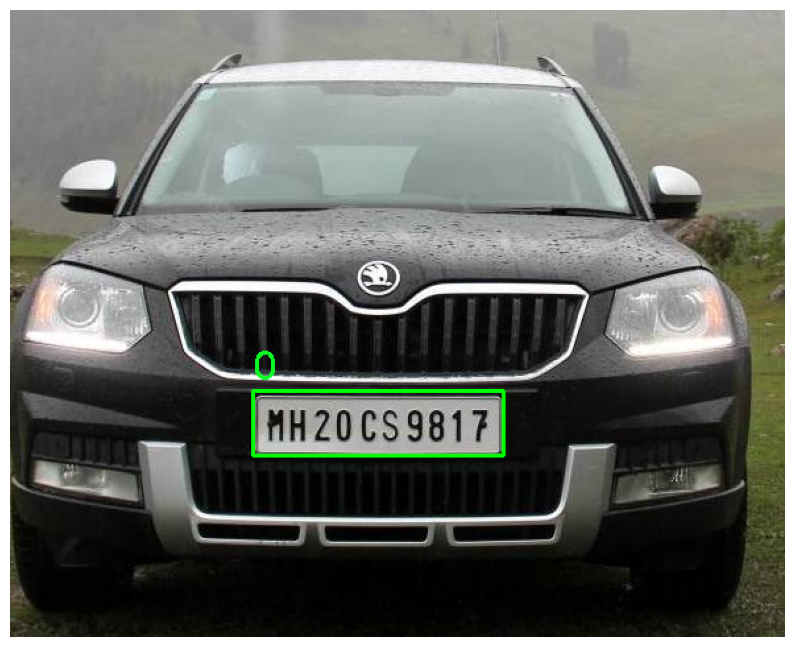

In [6]:
import cv2
import matplotlib.pyplot as plt

# Укажите пути к файлам изображения и аннотации
img_path = list_path_train_img[2]
annotation_path = list_path_train_label[2]

# Загрузка изображения
img = cv2.imread(img_path)
if img is None:
    print("Не удалось загрузить изображение")
    exit()

height, width, _ = img.shape

# Чтение аннотаций
with open(annotation_path, "r") as f:
    lines = f.readlines()

for line in lines:
    # Ожидается, что каждая строка имеет формат:
    # <class_id> <x_center> <y_center> <width> <height> (в нормализованных координатах)
    parts = line.strip().split()
    if len(parts) != 5:
        continue  # Пропустить строку, если формат неверный
    class_id, x_center, y_center, bbox_width, bbox_height = map(float, parts)

    # Преобразование нормализованных координат в пиксельные
    x_center_pixel = x_center * width
    y_center_pixel = y_center * height
    bbox_width_pixel = bbox_width * width
    bbox_height_pixel = bbox_height * height

    # Определяем координаты верхнего левого и нижнего правого углов
    x1 = int(x_center_pixel - bbox_width_pixel / 2)
    y1 = int(y_center_pixel - bbox_height_pixel / 2)
    x2 = int(x_center_pixel + bbox_width_pixel / 2)
    y2 = int(y_center_pixel + bbox_height_pixel / 2)

    # Рисуем прямоугольник (bounding box)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    # Можно добавить текст с номером класса
    cv2.putText(img, str(int(class_id)), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

# OpenCV загружает изображение в формате BGR, поэтому конвертируем в RGB для отображения с matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()


In [7]:
#pip install -U ultralytics

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=dataset.yaml epochs=20 imgsz=640, batch = 16, save = True, envolve = True

In [ ]:
!yolo task=detect mode=val model=yolov8m.pt data=dataset.yaml, save_json = True

In [ ]:
!yolo task=detect mode=predict model=yolov8m.pt source=dataset\images\test save_txt=True save_conf=True save_crop=True

Ultralytics 8.3.87 🚀 Python-3.12.1 torch-2.6.0+cpu CPU (13th Gen Intel Core(TM) i5-13600KF)
YOLOv8m summary (fused): 92 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs

image 1/169 d:\Projects\License Plate\dataset\images\val\video4_3860.jpg: 512x640 1 person, 2 cars, 343.4ms
image 2/169 d:\Projects\License Plate\dataset\images\val\video4_50.jpg: 384x640 1 car, 255.6ms
image 3/169 d:\Projects\License Plate\dataset\images\val\video5_0.jpg: 640x512 1 person, 1 car, 297.3ms
image 4/169 d:\Projects\License Plate\dataset\images\val\video5_10.jpg: 640x640 2 persons, 1 car, 394.1ms
image 5/169 d:\Projects\License Plate\dataset\images\val\video5_100.jpg: 416x640 1 car, 275.4ms
image 6/169 d:\Projects\License Plate\dataset\images\val\video5_110.jpg: 416x640 1 car, 267.7ms
image 7/169 d:\Projects\License Plate\dataset\images\val\video5_120.jpg: 384x640 1 car, 1 bus, 247.6ms
image 8/169 d:\Projects\License Plate\dataset\images\val\video5_130.jpg: 384x640 1 car, 1 parking meter, 219.1ms
im